# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

TA Reviews

Grade for Textual Description: 5.5

Grade for Code Quality: 5.25

Grade for Results: 5.25

Comments: Code quality: (especially section B3) code reusability is great but in this section you have functions you use only once. Plus, they prevent you from inspecting intermediary stages of your dataframe and make the code less easy to follow. Avoid using for loops  Results      

A2: great job on cleaning and validating, you could also use describe() or plots for getting a better idea about your data.           

A3.2: here you had to compute 20 largest part categories (in terms of the number of parts belonging to the category), which is unrelared to the quantity in inventory sets.          

A3.3: great job but you should have handled the color of [ [No color], Unknown] separately            

B2:  Plan Duration should also be converted to category. End Time, Start Time should be converted into a datetime (you had to do that operation multiple times later to answer questions, which is not efficient). You should not keep station ids and their coordinates into two different tables (starting and end). Moreover, there is not a 1-2-1 mapping between station ID and coordinates in your tables.           

B3.4: Note the question asked you to compute proportion of trips by passholder type AND trip route category (and not given trip route category, proportion of trips by passholder type ).           

B3.5:round up your results.  Textual description: good job on your analysis. Some nitpick advice: make a separation between describing your approach of solving the problem and interpreting the results. The analysis of the plots should come after each plot, not at the end. 

In [1]:
# Add your imports here
%matplotlib inline
import numpy as np
import pandas as pd
import re  #regular expression
from os import walk  #to detect file name
import matplotlib.pyplot as plt #for plot
from datetime import datetime

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
# import all datasets in one file
namespace = locals()
for root, _, files in walk(LEGO_DATA_FOLDER):   #return three list 
    for name in files:
        namespace[name.split('.')[0]] = pd.read_csv(LEGO_DATA_FOLDER + "/" + name)

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# Write your code here
# cleaning data 
# express time in same format by replacing irregular date format and correcting wrong year number like -20133

"""This part is for detecting and correcting irregular year."""
sets.year = sets.year.replace(['70s','80s'],value=['1970','1980']) # replace '70s','80s' by '1970','1980'
sets.year = sets.year.str.extract(r'(\d{4})', expand = False) # extract the top 4 digits in year to avoid minus and duplicate numbers 

print('The time range of the sets is {} years. [{}-{}]'.format\
      (pd.to_numeric(sets.year.max())-pd.to_numeric(sets.year.min()),\
       pd.to_numeric(sets.year.min()),pd.to_numeric(sets.year.max())))

# Validate function to check if year is a valid digit between 1900 to 2018
def validate_year(year):         
    year = pd.to_numeric(year)
    if year < 1900 or year > 2018:
        return False
    return True

if(sets['year'].apply(validate_year).values.all()):
    print('Years in dataset are validated with correct format.\n')
else:
    print('Years in dataset are not in the correct format.\n')

""" The next part is for inventory parts quantity."""

# replace negative infinite by zero in inventory parts
inventory_parts.quantity = inventory_parts['quantity'].replace(to_replace=-np.inf, value = 0)
print('Average quantity of inventory parts is %.3f' % inventory_parts.quantity.mean())

# Validate function to check if quantity of the inventory parts is a nonnegative digit 
def validate_quantity(quantity):         
    if quantity < 0:
        return False
    return True

if(inventory_parts['quantity'].apply(validate_quantity).values.all()): #check if quantity is in valid form
    print('Quantities in dataset are validated with correct format.')
else:
    print('Quantities in dataset are not in the correct format.')


The time range of the sets is 67 years. [1950-2017]
Years in dataset are validated with correct format.

Average quantity of inventory parts is 2.767
Quantities in dataset are validated with correct format.


__\* Briefly explain your approach here \*__

The time range of the sets is 67 years, and the range is 1950-2017.
Average quantity of inventory parts is 2.767.

When we load the dataset 'sets' and explore the column 'year', we can notice that the time includes srtings like '70s' and some minus year like '-20055'. We think that these numbers are in wrong format and they should be '1970' and '2005' respectively. So we provide the codes which detect and clean such inconsistencies by replacing '70s' and '80s' with '1970' and '1980'. For the rest, we use the regular expression to match top 4 digits in every year, so that we can avoid minus and double last two digits.
Additionally, we provide a validation function to check whether all inputs of years are in correct format and range.

As for the inventory parts quantity, we notice that there are some minus infinite and we replace them with 0s.
Aslo, we provide a validation function to check if the quantity is non-negative.



### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [6]:
# Write your code here
# A3.1
names = sets.name.str.lower() # convert all alphabets into lower case to avoid case sensitivity
idx_car = sets[names.str.contains(r'\bcar\b|\bcars\b')].copy() # using regex to match the word 'car' or 'cars' but avoiding substring containing 'car' or 'cars'
car = pd.merge(idx_car, inventory_sets, left_on='id', right_on='set_id') # assigning car id with inventory set id
car_inventory = car.groupby(['inventory_id']).count()
print(car_inventory.index)

Int64Index([  500,   528,   908,  1371,  1401,  1418,  1649,  1716,  1732,
             2559,  2814,  2917,  3109,  3764,  4051,  4187,  4430,  4969,
             5110,  5358,  5857,  5904,  6066,  6086,  6296,  6530,  7151,
             7363,  7430,  7881,  8140,  8202,  8348,  8820,  9178,  9426,
            10028, 10158, 10406, 10515, 11861, 11966, 12110, 12437, 12851,
            13083, 13355, 13380, 13398, 13427, 13696, 13941, 14011, 14174,
            14493, 14711, 14919, 15010, 15694, 16131],
           dtype='int64', name='inventory_id')


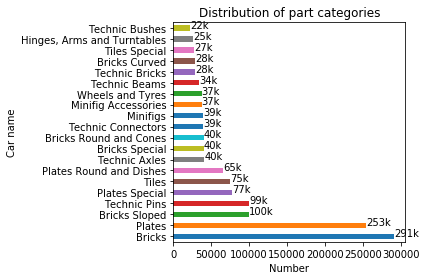

In [7]:
# A3.2
# merge part_categories, parts and inventory_parts, id = part categories id, id_y = parts ID
parts_merged = pd.merge(part_categories, parts, left_on='id', right_on='part_cat_id')\
               .merge(inventory_parts, left_on='id_y', right_on='part_id') 

# find the top 20 largest part categories, name_x = part category name 
result = parts_merged.groupby(['name_x']).sum().sort_values(ascending=False, by = 'quantity')[:20] 
result['quantity'].plot(kind='barh') # plot the result as horizontal bar chart

# showing the value of every bar
plt1 = result['quantity'].plot(kind='barh')
for bar in range(len(result)):
    plt.text(result['quantity'][bar],bar,str(result['quantity'][bar])[0:-5]+'k')
    plt1.set_xlabel('Number')
    
plt1.set_ylabel('Car name')
plt1.set_title('Distribution of part categories')
fig = plt1.get_figure()
fig.tight_layout()
fig.savefig("A3.2 Distribution of part categories.png")

AxesSubplot(0.125,0.125;0.775x0.755)


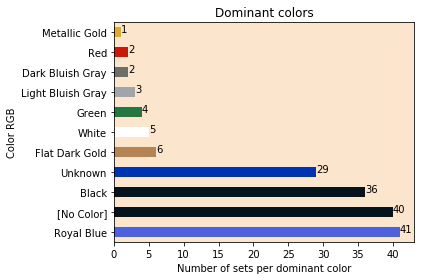

In [8]:
# A3.3
# merge sets, inventory_sets, colors and inventory parts
set_merged = pd.merge(sets, inventory_sets, left_on='id', right_on='set_id')\
            .merge(inventory_parts, left_on='inventory_id', right_on='inventory_id')\
            .merge(colors, left_on='color_id', right_on='id') 

# calculate the quantity of parts, quantity_x: quantity in inventory_sets, quantity_y: quantity in inventory_parts
set_merged['total'] = set_merged['quantity_y']* set_merged['quantity_x']  

# sum up quantity of parts in same color by different set id, id_x: set id
merged_sum = set_merged.groupby(['id_x','color_id']).sum()['total']

loc = merged_sum.reset_index().groupby(['id_x'])['total'].idxmax() # get the index of maximum value on every set id 

# using maximum value index to get dominant color for every set id
colormerged = pd.merge(merged_sum.iloc[loc].reset_index(), colors, left_on='color_id', right_on='id') 

result_name = colormerged.name.value_counts() # getting the number of color names for every color id
result_rgb = colors.set_index('name').loc[result_name.index].rgb.get_values() # getting the color rgb for every color id
colorname = ['#'+str(result_rgb[i]) for i in range(len(result_rgb))] # creating a list for rgb values

# plotting horizontal bar chart showing number of sets per dominant color
ax = result_name.plot(kind='barh', color=colorname,title = 'Dominant colors') 
ax.set_ylabel("Color RGB")
ax.set_xlabel("Number of sets per dominant color")
ax.set_facecolor('#fce5cd')

# showing the value of every bar
for bar in range(len(result_name)):
    ax.text(result_name[bar],bar,str(result_name[bar]))
print(ax)
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("A3.3 Dominant colors.png")

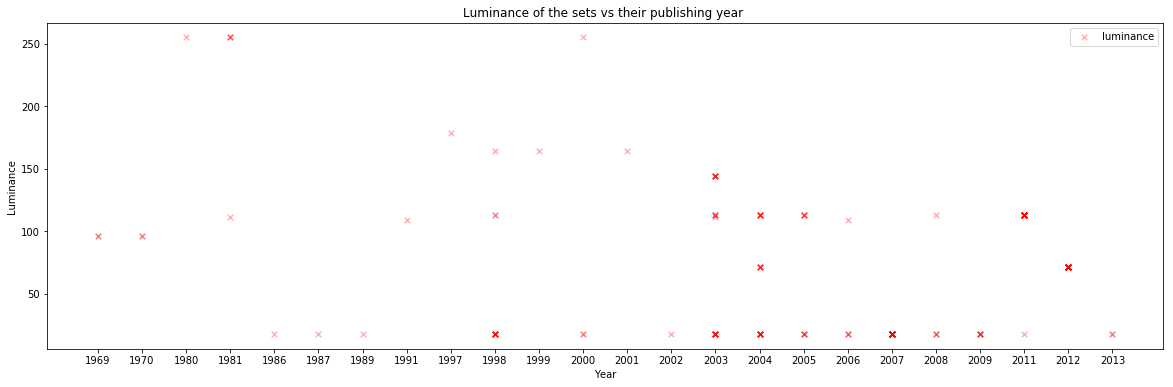

In [9]:
# A3.4
data_gen = merged_sum.iloc[loc].reset_index() # the maximum quantity for every dominant color per set
data_with_color = pd.merge(data_gen, colors, left_on='color_id', right_on='id') # merging data_gen with colors
lum = []
for rgb_value in data_with_color['rgb']: # getting rgb for every dominant color per set and calculate the luminance
    lum.append(np.sqrt(0.299*int(rgb_value[0:2], 16)**2 + 0.587*int(rgb_value[2:4], 16)**2 + 0.114*int(rgb_value[4:6], 16)**2))

data_with_color['lum'] = lum # add luminance column to the data_with_color dataframe 

# getting luminance of dominant color for every year
result = pd.merge(data_with_color, sets, left_on='id_x', right_on='id')[['lum','year']].sort_values('year') 

# plotting the result in scatter
plt.figure(figsize=(20,6))
ax = plt.scatter(result['year'],result['lum'],s=30,c='red',marker='x',alpha=0.3,label='luminance')
plt.title('Luminance of the sets vs their publishing year ')
plt.xlabel('Year')
plt.ylabel('Luminance')
plt.legend(loc='upper right')
plt.show()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("A3.4 Luminance of the sets vs publishing year.png")

__\* Briefly explain your approach for every query here \*__

Do you see a trend over the last years? How do you interpret it?

1. In this part we print the IDs of inventories that belong to sets that contains 'car' or 'cars' in the name of sets. 
2. Then we plot the distribution of 20 largest part categories in terms of the number of parts belonging to the category, by merging part_categories, parts and inventory_parts, by grouping the merged dataset with part category name.
3. We find the dominant color of each set by merging sets, inventory sets, colors and inventory parts. Then we calculate total quantity of parts in same color, then we group the sum of quantities in same color by different set id, thus getting the dominant color for every set and corresponding RGB. Finally we plot the result in horizontal bar charts with the respective color that every dominant color represents.
4. Here we get rgb for every dominant color per set and calculate the luminance, and we merge the result with sets to get the luminance of dominant color for every year. Then we show the result in scatters. In the figure, every 'x' means one point for luminance. The darker the 'x', the more points in same place, which implies larger quantity. We can see there are more and darker 'x' in lower space from 2003, which implies a trend for darker colors. 

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [10]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [11]:
# Write your code here
bike = pd.read_json(BIKES_DATA_FOLDER+'/metro-bike-share-trip-data.json.zip')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [12]:
bike.describe()
# from table below we can see the value range of each attribute (from min to max).

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [13]:
bike.info()
# from the table below we can see the type of each attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
Bike ID                       132417 non-null float64
Duration                      132427 non-null int64
End Time                      132427 non-null object
Ending Station ID             132331 non-null float64
Ending Station Latitude       131376 non-null float64
Ending Station Longitude      131376 non-null float64
Passholder Type               132427 non-null object
Plan Duration                 131661 non-null float64
Start Time                    132427 non-null object
Starting Station ID           132408 non-null float64
Starting Station Latitude     132379 non-null float64
Starting Station Longitude    132379 non-null float64
Trip ID                       132427 non-null int64
Trip Route Category           132427 non-null object
dtypes: float64(8), int64(2), object(4)
memory usage: 14.1+ MB


In [14]:
bike['Passholder Type'] = bike['Passholder Type'].astype('category')
bike['Trip Route Category'] = bike['Trip Route Category'].astype('category')
bike.info()
# We set Passholder Type and Trip Route Category as categorical. 
# For the reason that they have 4 and 2 different inputs respectively.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
Bike ID                       132417 non-null float64
Duration                      132427 non-null int64
End Time                      132427 non-null object
Ending Station ID             132331 non-null float64
Ending Station Latitude       131376 non-null float64
Ending Station Longitude      131376 non-null float64
Passholder Type               132427 non-null category
Plan Duration                 131661 non-null float64
Start Time                    132427 non-null object
Starting Station ID           132408 non-null float64
Starting Station Latitude     132379 non-null float64
Starting Station Longitude    132379 non-null float64
Trip ID                       132427 non-null int64
Trip Route Category           132427 non-null category
dtypes: category(2), float64(8), int64(2), object(2)
memory usage: 12.4+ MB


In [15]:
bike.corr()
# Showing the correlation between attributes.

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
Bike ID,1.000000,-0.008610,-0.000206,0.001285,-0.001290,-0.002839,-0.000426,0.000449,-0.000451,0.002660
Duration,-0.008610,1.000000,-0.023487,-0.005372,0.005209,-0.042622,0.004797,-0.000866,0.000612,0.024486
Ending Station ID,-0.000206,-0.023487,1.000000,-0.473819,0.473070,0.003294,0.387330,-0.240795,0.240309,0.033333
Ending Station Latitude,0.001285,-0.005372,-0.473819,1.000000,-0.999922,0.002851,-0.228222,0.510170,-0.510131,0.020103
Ending Station Longitude,-0.001290,0.005209,0.473070,-0.999922,1.000000,-0.002778,0.227879,-0.510127,0.510172,-0.020577
Plan Duration,-0.002839,-0.042622,0.003294,0.002851,-0.002778,1.000000,-0.004905,0.003745,-0.003609,-0.027371
Starting Station ID,-0.000426,0.004797,0.387330,-0.228222,0.227879,-0.004905,1.000000,-0.440102,0.439200,0.044675
Starting Station Latitude,0.000449,-0.000866,-0.240795,0.510170,-0.510127,0.003745,-0.440102,1.000000,-0.999884,0.016428
Starting Station Longitude,-0.000451,0.000612,0.240309,-0.510131,0.510172,-0.003609,0.439200,-0.999884,1.000000,-0.016805
Trip ID,0.002660,0.024486,0.033333,0.020103,-0.020577,-0.027371,0.044675,0.016428,-0.016805,1.000000


In [16]:
# Write your code here
# extract redundant columns as new dataframes.
start_position = bike[['Starting Station ID','Starting Station Latitude','Starting Station Longitude']].set_index(['Starting Station ID']).drop_duplicates()
end_position = bike[['Ending Station ID','Ending Station Latitude','Ending Station Longitude']].set_index(['Ending Station ID']).drop_duplicates()
bike = bike.drop(columns=['Starting Station Latitude','Starting Station Longitude','Ending Station Latitude','Ending Station Longitude'])

In [17]:
start_position.info()
# we show type of every attributes in start_position and the size of it is 128 entries with 2 columns.

<class 'pandas.core.frame.DataFrame'>
Float64Index: 128 entries, 3014.0 to 3039.0
Data columns (total 2 columns):
Starting Station Latitude     127 non-null float64
Starting Station Longitude    127 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


In [18]:
end_position.info()
# we show type of every attributes in end_position and the size of it is 128 entries with 2 columns.

<class 'pandas.core.frame.DataFrame'>
Float64Index: 128 entries, 3014.0 to 3039.0
Data columns (total 2 columns):
Ending Station Latitude     127 non-null float64
Ending Station Longitude    127 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


In [19]:
bike.info()
# we show type of every attributes in bike after reducing redundancy and the size of it is 132427 entries with 10 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 10 columns):
Bike ID                132417 non-null float64
Duration               132427 non-null int64
End Time               132427 non-null object
Ending Station ID      132331 non-null float64
Passholder Type        132427 non-null category
Plan Duration          131661 non-null float64
Start Time             132427 non-null object
Starting Station ID    132408 non-null float64
Trip ID                132427 non-null int64
Trip Route Category    132427 non-null category
dtypes: category(2), float64(4), int64(2), object(2)
memory usage: 8.3+ MB


__\* Briefly explain your approach here \*__

Here we calculate the Pearson correlation between every column and we find that the coefficient for ending station latitude and ending station longitude, as well as the starting station latitude and starting station longitude, is very close to 1 or -1, which means that they are related. So we consider them as redundant because they are only dependent on station ID. And we extract them out in new dataframes start_position and end_position, and drop latitude and longitude columns in the original bike dataframe.

'Duration' can also be redundant because it can be calculated from start time and end time for each row. But we keep it here as it is required in following task.

As for pitfall, the biggest downside is extra IO and storage overhead, as well as chance of anomalies. We reduce redundancy by extracting redundant columns from original dataframe, making the reduced data less susceptible to inconsistencies.

Besides, the output of bike.info() shows that there are some nans in several attributes. However, for every row we get enough information('Duration','Start time','Trip ID','Trip Route Category') to analyze even though some information('Bike ID','Ending Station ID','Plan Duration','Starting Station ID') is missing. So we do not drop out nans here.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [20]:
# Write your code here

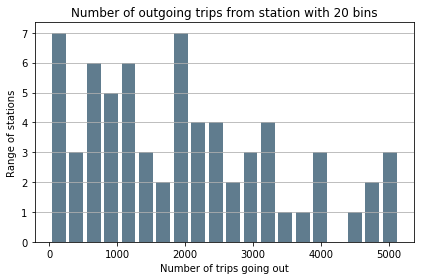

In [21]:
# B3.1
# Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
plt.hist(bike['Starting Station ID'].value_counts(),bins=20,rwidth = 0.8,color='#607c8e')
plt.title("Number of outgoing trips from station with 20 bins")
plt.xlabel('Number of trips going out')
plt.ylabel('Range of stations')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("B3.1 Number of outgoing trips with 20 bins.png")
plt.show()

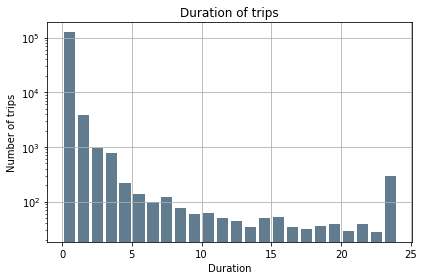

In [22]:
# B3.2.1
# Plot histograms for the duration by converting duration seconds into hours and plot in log axis
bike.Duration.apply(lambda x: x/3600).hist(bins=24, rwidth=0.8, color='#607c8e', log=True)
plt.title("Duration of trips")
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.tight_layout()
plt.savefig("B3.2.1 Duration of trips.png")
plt.show()

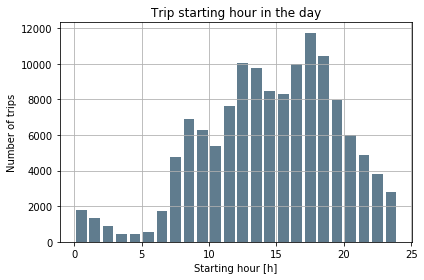

In [23]:
# B3.2.2
# Plot histograms for trip starting hour in the day attributes. 
plt.hist(pd.to_datetime(bike['Start Time']).apply(lambda x: x.hour), bins=range(0,25), rwidth=0.8, color='#607c8e')
plt.title('Trip starting hour in the day')
plt.xlabel('Starting hour [h]')
plt.ylabel('Number of trips')
plt.grid(axis='both')
plt.tight_layout()
plt.savefig("B3.2.2 Trip starting hour in the day.png")
plt.show()

In [24]:
# B3.3
# a general function used to plot proportion of trips
def plottrip(toplotfr,cate1,group1,group2,cate2,title,stacked,df=False):
    
    monthly,walkup,flexpass,staff = cal_proportion(toplotfr,cate1,group1,group2,cate2)
    ind = np.arange(2)
    width = 0.2
    if stacked == False:
        p1 = plt.bar(ind, monthly, width, label='Monthly Pass')
        p2 = plt.bar(ind+width, walkup, width, label='Walk-up')
        p3 = plt.bar(ind+2*width, flexpass, width, label='Flex Pass')
        p4 = plt.bar(ind+3*width, staff, width, label='Staff Annual')
        plt.xticks(ind+width, ('One Way Trip','Round Trip'))
    else: 
        p1 = plt.bar(ind, monthly, width, label='Monthly Pass')
        p2 = plt.bar(ind, walkup, width, bottom=monthly, label='Walk-up')
        p3 = plt.bar(ind, flexpass, width, bottom=[i+j for i,j in zip(monthly,walkup)], label='Flex Pass')
        p4 = plt.bar(ind, staff, width, bottom=[i+j+k for i,j,k in zip(monthly,walkup,flexpass)], label='Staff Annual')
        plt.xticks(ind, ('One Way Trip','Round Trip'))
        
    plt.xlabel('Trip Route Category')
    plt.ylabel('Proportion of each catagory')
    plt.title('Proportion of trips %s'%title)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend()
    plt.tight_layout()
    plt.savefig('Proportion of trips %s.png'%title)
    plt.show()
    
    if df==False:
        return
    else:
        return tripframe(monthly,walkup,flexpass,staff)

In [25]:
# function used to convert category types into objects and to normalize the proportion of each category
def cal_proportion(toplotfr,cate1,group1,group2,cate2):
    toplotfr[cate1] = toplotfr[cate1].astype('object')
    toplotfr[cate2] = toplotfr[cate2].astype('object')
    
    g1 = toplotfr[toplotfr[cate1].apply(lambda x: x.endswith(group1))][cate2].value_counts()
    g2 = toplotfr[toplotfr[cate1].apply(lambda x: x.endswith(group2))][cate2].value_counts()
    
    # normalize the proportion of each category
    monthly = [g1['Monthly Pass']/sum(g1),g2['Monthly Pass']/sum(g2)]
    walkup = [g1['Walk-up']/sum(g1),g2['Walk-up']/sum(g2)]
    flexpass = [g1['Flex Pass']/sum(g1),g2['Flex Pass']/sum(g2)]
    staff = [g1['Staff Annual']/sum(g1),g2['Staff Annual']/sum(g2)]
    
    return monthly,walkup,flexpass,staff

In [26]:
# function to return the output of the cal_proportion function as a dictionary
def tripframe(monthly,walkup,flexpass,staff):
    df = pd.DataFrame({'Trip Category':['One way','Round Trip'],
                       'Monthly':[monthly[0],monthly[1]],
                       'Walk-up':[walkup[0],walkup[1]],
                       'Flexpass':[flexpass[0],flexpass[1]],
                       'Staff Annual':[staff[0],staff[1]]})
    df = df.set_index('Trip Category')
    return df

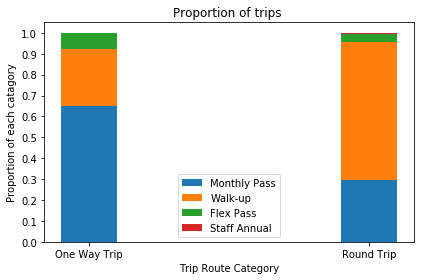

In [27]:
plottrip(bike,'Trip Route Category','One Way','Round Trip','Passholder Type','',stacked = True)

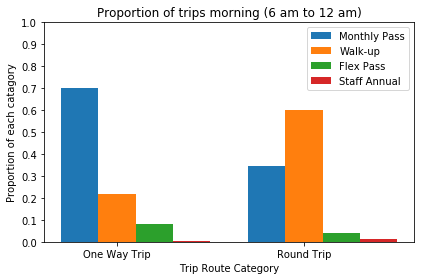

In [28]:
# B2.4
hour = pd.to_datetime(bike['Start Time']).apply(lambda x:x.hour) 
idx_morning = [i for i,v in enumerate(hour) if 5<v<13] # we set the morning time as 6 - 12
morning = bike.loc[idx_morning].copy()
plottrip(morning,'Trip Route Category','One Way','Round Trip','Passholder Type','morning (6 am to 12 am)',stacked = False)

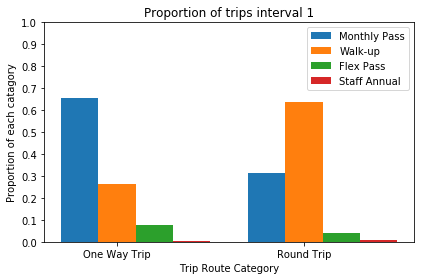

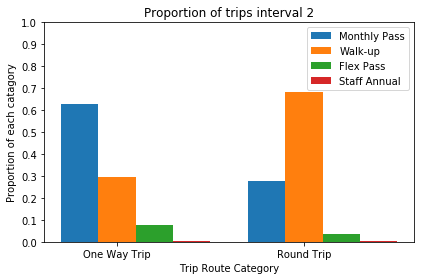

In [29]:
# B3.5
hours = pd.Series(hour)
sortedhour = hours.value_counts().sort_index()
idx = max([i for i in range(len(sortedhour)) if abs(sum(sortedhour[0:i])-\
            sum(sortedhour[i:len(sortedhour)]))>abs(sum(sortedhour[0:i+1])-sum(sortedhour[i+1:len(sortedhour)]))])
# find the idx that separate the day in two parts, and each part has similar number of trips
halfday1 = bike[hours<idx+1].copy()
firstinv = plottrip(halfday1,'Trip Route Category','One Way','Round Trip','Passholder Type','interval 1',stacked = False,df=True)
halfday2 = bike[hours>idx-1].copy()
secondinv = plottrip(halfday2,'Trip Route Category','One Way','Round Trip','Passholder Type','interval 2',stacked = False,df=True)

In [30]:
# creating a dataframe with a unique index
inv = firstinv.join(secondinv, on='Trip Category', lsuffix = '_first', rsuffix='_second').reset_index()
inv

,Trip Category,Monthly_first,Walk-up_first,Flexpass_first,Staff Annual_first,Monthly_second,Walk-up_second,Flexpass_second,Staff Annual_second
0,One way,0.657161,0.262668,0.077116,0.003055,0.629936,0.293462,0.074313,0.002289
1,Round Trip,0.314134,0.636170,0.040729,0.008967,0.278732,0.681050,0.036308,0.003910


__\* Briefly explain your approach for every query here \*__
1. We plot the distribution of the number of outgoing trips from each stations by a range of counts.
2. We plot histograms for the duration and trip starting hour in the day attributes. From duration histogram, we can observe that mostly people just use the bikes for short time (1-2 hours), and a spike in 24 hours may imply that many people rent bike for a whole day. From the starting hour histogram, we find out that people prefer to go out in the afternoon. And local maximum appears around 8 am, 12 am-1 pm and 6 pm. These local maximums show the time when people go to work in the morning, have lunch in the noon and go back home in the evening.
3. We calculate and plot the proportion of trips by passholder type for each trip route category, and show the results in a stacked bar chart with normalized height.
4. Here we consider 6 am to 12 am is the morning hour, and we plot single bar chart showing the proportion of trips by passholder type and trip route category. We can observe that round walk-up (single ride) trips in the morning have very high percentage, which we think that may be an outlier, because is highly unusual to rent a single ride bike to make a round trip in the morning.
5. We try to find two intervals having similar bike trips numbers by finding an index. And we find out that 14 is the hour meeting the requirement. The proportion of trips does not change whether it is the first or second interval. We do not think that the company will have significant benefit by creating a paying scheme where monthly pass users would pay less in the first interval, because the proportion and number of monthly pass does not change dramatically. Additionally, we present our results in a DataFrame with a unique, non-composite index.